# 인공 신경망

## 패션 MNIST

In [1]:
import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


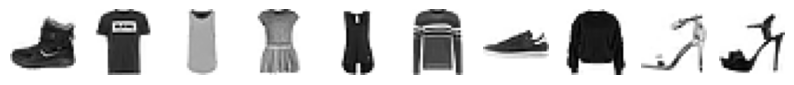

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [7]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [9]:
# 에포크 수를 늘려도 성능이 올라가지 않음
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

sc = SGDClassifier(loss='log_loss', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8311666666666667
0.8437333333333334


## 인공 신경망

### 텐서플로와 케라스

| 이름 | 정체 | 설명 |
|------|------|------|
| **Keras** | 고수준 API (High-Level API) | TensorFlow 안에서 동작하는 모델 설계 도구. 쉽게 딥러닝 모델 만들도록 도와줌 |
| **TensorFlow** | 딥러닝 프레임워크 | 저수준 연산, 자동 미분, GPU 지원, 모델 배포 등 포함한 **풀스택 머신러닝 프레임워크** |
| **PyTorch** | 딥러닝 프레임워크 | 동적 계산 그래프 기반. 직관적이고 유연하며 연구와 프로토타이핑에 적합 |
| **JAX** | 수치 연산 라이브러리 + 자동 미분 엔진 | NumPy 스타일 코드 + XLA 컴파일로 고성능. 자동 벡터화 및 함수 변환 기능 제공 |

In [10]:
import keras

keras.config.backend()

# 케라스의 백엔드를 변경하고 싶다면
# import os
# os.environ["KERAS_BACKEND"] = "torch"
# os.environ["KERAS_BACKEND"] = "jax"

'tensorflow'

## 인공신경망으로 모델 만들기

In [11]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [12]:
# 입력층 정의
# input으로 변수명을 정하면 input()을 사용하지 못하므로 inputs로 설정
inputs = keras.layers.Input(shape=(784,))

In [13]:
# 밀집층 정의
# 양쪽의 뉴런이 모두 연결되어 있으므로 완전 연결층
dense = keras.layers.Dense(10, activation='softmax')

In [14]:
# 입력층과 밀집층 가진 모델 정의
model = keras.Sequential([inputs, dense])

## 인공 신경망으로 패션 아이템 분류하기

In [15]:
# 손실 함수의 종류 설정
# categorical_crossentropy: 정답 라벨 형식이 원-핫 인코딩(one-hot)
# sparse_categorical_crossentrop: 정답 라벨 형식이 수 인덱스(integer)
# 케라스는 모델이 훈련할 때 기본으로 에포크마다 손실 값을 출력 -> 손실이 줄어드는 것을 보고 훈련이 잘 되었다는 것을 판단할 수 있지만 'accuracy'를 통해서 정확도도 확인
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [17]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7355 - loss: 0.7857
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8388 - loss: 0.4780
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8447 - loss: 0.4557
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8549 - loss: 0.4316
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8565 - loss: 0.4206


In [18]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.4265


[0.43455517292022705, 0.8540833592414856]

# 심층 신경망

## 2개의 층

In [19]:
import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [20]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [21]:
inputs = keras.layers.Input(shape=(784,))
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망(DNN) 만들기

In [22]:
model = keras.Sequential([inputs, dense1, dense2])

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 층을 추가하는 다른 방법

In [24]:
model = keras.Sequential([
    keras.layers.Input(shape=(784, )),
    keras.layers.Dense(100, activation='sigmoid', name='hidden layer'),
    keras.layers.Dense(10, activation='softmax', name='output layer')
], name='패션 MNIST 모델')

In [25]:
model.summary()

Model: "패션 MNIST 모델"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden layer (Dense)            │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(784,)))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7462 - loss: 0.7768
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8486 - loss: 0.4235
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8610 - loss: 0.3848
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8725 - loss: 0.3522
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8755 - loss: 0.3392


## 렐루 함수

In [29]:
# Flatten 층은 가중치나 절편 없이 펼치기만 진행
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7587 - loss: 0.6877
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8565 - loss: 0.3993
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8723 - loss: 0.3523
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8795 - loss: 0.3355
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8875 - loss: 0.3159


In [33]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.3473


[0.3490149676799774, 0.8794166445732117]

## 옵티마이저

### 기본 경사 하강법 옵티마이저

SGD
```python
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
```python
sgd = keras.optimizers.SGD(learning_rate=0.1)  # 학습률은 한 번의 학습 단계에서 파라미터를 얼마나 크게 바꿀지를 정함
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
모멘텀
```python
sgd = keras.optimizers.SGD(momentum=0.9)
```
네스테로프 모멘텀
```python
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
```

### 적응적 학습률 옵티마이저

Adagrad
```python
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy']
```
RMSprop(기본값)
```python
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy']
```
Adam
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
```

In [34]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [35]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7712 - loss: 0.6651
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8567 - loss: 0.4015
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8717 - loss: 0.3571
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8798 - loss: 0.3253
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8873 - loss: 0.3053


In [36]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3318


[0.33129581809043884, 0.8801666498184204]

## 파이토치로 신경망 모델 만들기

In [37]:
from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root='.', train=False, download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 269kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.94MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.96MB/s]


In [38]:
# 실제 데이터는 fm_train과 fm_test 객체의 data 속성에 PyTorch Tensor로 저장
# Tensor는 파이토치의 기본 데이터 구조
type(fm_train.data)

torch.Tensor

In [39]:
print(fm_train.data.shape, fm_test.data.shape)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


In [40]:
print(fm_train.targets.shape, fm_test.targets.shape)

torch.Size([60000]) torch.Size([10000])


In [41]:
train_input = fm_train.data
train_target = fm_train.targets

In [42]:
train_scaled = train_input / 255.0

In [43]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [44]:
print(train_scaled.shape, val_scaled.shape)

torch.Size([48000, 28, 28]) torch.Size([12000, 28, 28])


In [45]:
import torch.nn as nn

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
    # 소프트맥스 함수 생략 -> 추후에 사용될 nn.CrossEntropyLoss()에 포함
)

In [46]:
!pip install torchinfo

In [47]:
from torchinfo import summary

summary(model)

Layer (type:depth-idx)                   Param #
Sequential                               --
├─Flatten: 1-1                           --
├─Linear: 1-2                            78,500
├─ReLU: 1-3                              --
├─Linear: 1-4                            1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0

In [48]:
summary(model, input_size=(32, 28, 28))  # input_size에 입력 크기를 지정 -> 입력 데이터가 각층을 통과할 때 크기가 어떻게 변하는지 확인할 수 있음

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Flatten: 1-1                           [32, 784]                 --
├─Linear: 1-2                            [32, 100]                 78,500
├─ReLU: 1-3                              [32, 100]                 --
├─Linear: 1-4                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45

In [49]:
# 코랩에서 GPU 런타임을 사용하고 있다면 앞서 만든 모델을 GPU에 적재해야 함
# 케라스는 자동 감지하지만 파이토치는 명시해야 함
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=100, bias=True)
  (2): ReLU()
  (3): Linear(in_features=100, out_features=10, bias=True)
)

In [50]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
# 옵티마이저를 만들 때 훈련 과정에서 최적화시킬 파이토치 텐서를 전달해야 함
# parameters() 메서드를 호출하면 훈련 가능한 모든 모델 파라미터를 전달해 줌

모델 훈련
- fit() 없음 -> for 문으로 구현

```
for 에포크 반복
    에포크 손실 초기화
    for 배치 반복
        배치 입력과 타깃 준비
        옵티마이저 그레디언트(손실 함수에서 내려가야 할 방향과 크기를 알려주는 값) 초기화
        모델에 입력 전달
        모델 출력과 타깃으로 손실 계산
        손실 역전파
        모델 파라미터 업데이트
        에포크 손실 기록
    에포크 손실 출력
```


In [51]:
epochs = 5                           # 에포크 횟수
batches = int(len(train_scaled)/32)  # 배치 횟수
for epoch in range(epochs):
    model.train()                    # 모델을 훈련 모드로 설정 -> 신경망 층 중에는 훈련할 때와 평가할 때 다르게 동작하는 층이 있기에 명시적으로 알려줌
    train_loss = 0                   # 훈련 손실 기록
    for i in range(batches):
        inputs = train_scaled[i*32:(i+1)*32].to(device)  # 32개씩 배치 데이터를 덜어냄
        targets = train_target[i*32:(i+1)*32].to(device)
        optimizer.zero_grad()                            # 배치를 처리할 때마다 새로운 그레이디언트를 계산해야 하므로 옵티마이저의 그레이디언트 초기화
        outputs = model(inputs)                          # 순전파: 배치를 모델에 전달하여 출력 생성
        loss = criterion(outputs, targets)               # 모델이 계산한 출력과 타깃을 손실함수에 전달하여 손실 계산
        loss.backward()                                  # 역전파: 손실을 모델의 출력층에서부터 입력층 방향으로 거꾸로 전달하여 각 층의 모델 파라미터에 대한 그레이디언트 계산
        optimizer.step()                                 # 앞서 계산된 그레이디언트를 기반으로 모델 파라미터를 업데이트
        train_loss += loss.item()                        # 손실값 누적
    print(f"에포크:{epoch + 1}, 손실:{train_loss/batches:.4f}")

에포크:1, 손실:0.5447
에포크:2, 손실:0.3977
에포크:3, 손실:0.3564
에포크:4, 손실:0.3287
에포크:5, 손실:0.3089


In [52]:
model.eval()                            # 모델 평가 선언
with torch.no_grad():                   # 그레이디언트 계산은 하지 않음
    val_scaled = val_scaled.to(device)  # 검증 세트 GPU에 적재
    val_target = val_target.to(device)  # 타깃 GPU에 적재
    outputs = model(val_scaled)         # 검증 세트의 샘플 12000개에 대해 타깃 클래스마다 출력한 값
    predicts = torch.argmax(outputs, 1) # 각 샘플마다 가장 큰 값의 인덱스를 추출하면 예측 클래스 -> torch.argmax()를 사용해 두 번째 축을 따라 가장 큰 값의 인덱스를 저장
    corrects = (predicts == val_target).sum().item() # 올바르게 예측한 개수를 헤아려 변수에 저장

accuracy = corrects / len(val_target)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.8701


# 신경망 모델 훈련

## 손실 곡선

In [53]:
import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [54]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28,28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [55]:
model = model_fn()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# verbose는 훈련 과정 출력을 조절
# verbose=0 훈련 과정을 보여주지 않음
# verbose=1 에포크마다 진행 막대와 함께 손실 등의 지표가 출력
# verbose=2 진행 막대를 빼고 출력

In [57]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


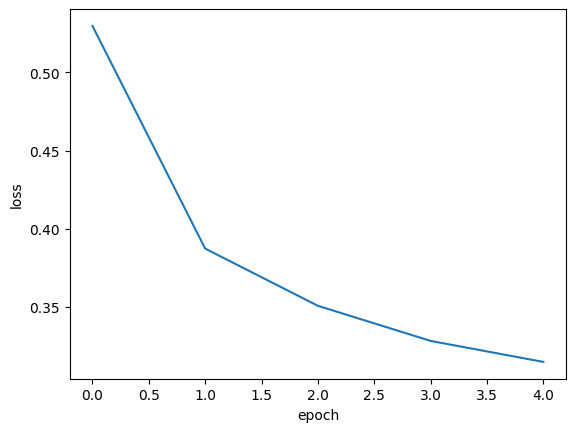

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

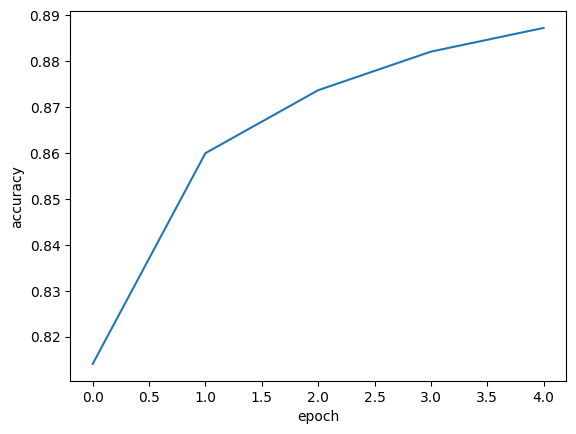

In [59]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

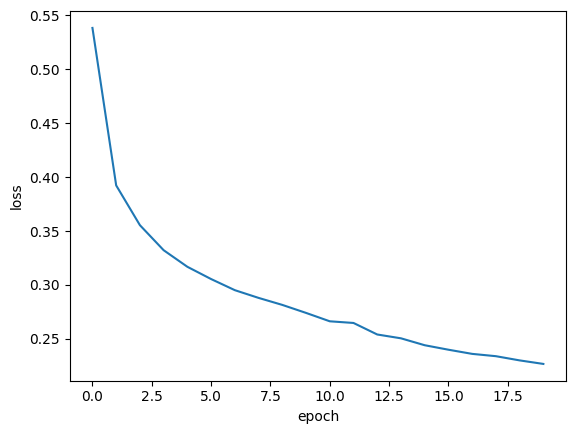

In [60]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [61]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [62]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


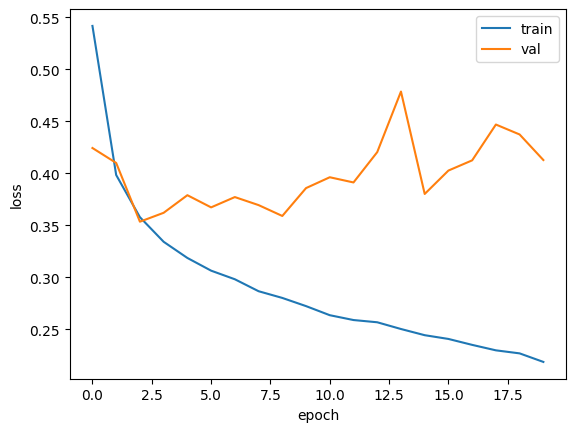

In [63]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

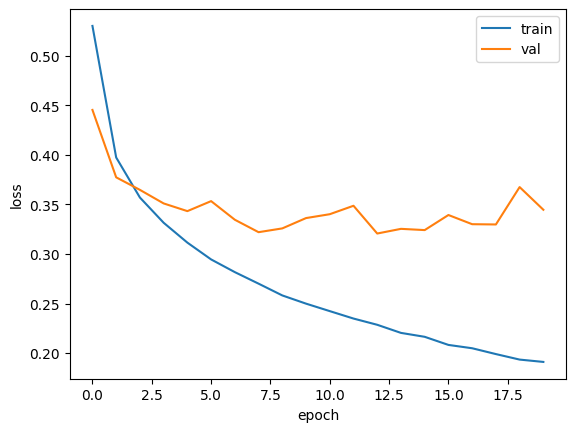

In [64]:
# RMSprop 대신 Adam 선택
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 드롭아웃

In [65]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

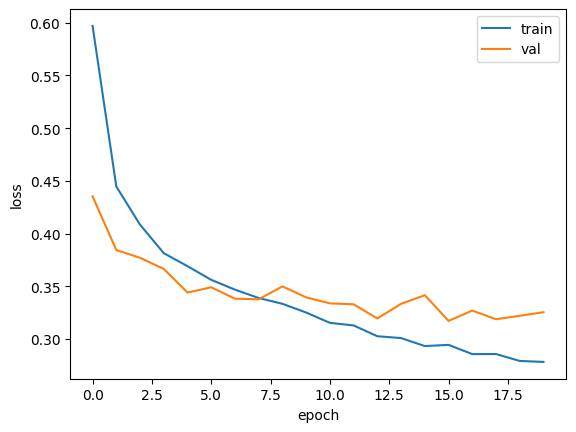

In [66]:
# 평가와 예측에 모델을 사용할 때는 드롭아웃이 자동으로 적용되지 않음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 모델 저장과 복원

In [67]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=7, verbose=0, validation_data=(val_scaled, val_target))

In [68]:
model.save('model-whole.keras')

In [69]:
# 훈련된 모델의 파라미터만 저장
model.save_weights('model.weights.h5')

In [70]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Jun  3 03:12 model.weights.h5
-rw-r--r-- 1 root root 979393 Jun  3 03:12 model-whole.keras


In [71]:
# 훈련하지 않은 모델을 생성하고, 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [72]:
# predict()는 n개의 클래스에 대한 확률을 반환
# (12000,10) 크기의 배열을 반환하기 때문에 10개 확률 중 가장 큰 값의 인덱스만 골라야 함
# evaluate()을 통해 정확도를 출력할 수 있지만 compile()이 선행되어야 하므로 패스
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)  # argmax()는 배열에서 가장 큰 값의 인덱스를 반환
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.8765833333333334


In [73]:
# 모델 전체를 파일에서 읽은 다음 정확도 출력
# load_model()은 파라미터뿐ㅁ나 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하므로 evaluate() 사용 가능
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8748 - loss: 0.3430


[0.3408343195915222, 0.8765833377838135]

## 콜백

In [74]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)  # ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장, save_best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델을 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])  # best-model.h5에 최상의 검증 점수를 낸 모델이 저장됨

In [75]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8855 - loss: 0.3176


[0.31827691197395325, 0.8869166374206543]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-mdoel.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)  # patience 매개변수는 검증 점수가 개선되지 않아도 n번은 더 기다림, restore_best_weights=True는 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
print(early_stopping_cb.stopped_epoch)  # 몇 번째 에포크에서 훈련이 중지되었는지 확인 -> 13번째 에포크(0부터 카운팅)에서 최상의 모델은 11번째 에포크

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [80]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8876 - loss: 0.3144


[0.3151114284992218, 0.8880833387374878]